## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [15]:
# import QueryResults.csv via pandas
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [16]:
# Read the CSV file located in the same directory
df = pd.read_csv('QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [17]:
# Display the first 5 rows
display(df.head())

# Display the last 5 rows
display(df.tail())

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


,m,TagName,Unnamed: 2
2191,2021-10-01 00:00:00,delphi,142
2192,2021-10-01 00:00:00,go,697
2193,2021-10-01 00:00:00,java,6518
2194,2021-10-01 00:00:00,javascript,13719
2195,2021-10-01 00:00:00,perl,127


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [18]:
# Get the dimensions of the dataframe
# Returns a tuple: (number_of_rows, number_of_columns)
df.shape

(2196, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [19]:
# count the number of entries in each column of the dataframe
df.count()
# # check total number of rows (including those with missing values)
# len(df)
# # another way to check total number of rows
# df.shape[0]

m             2196
TagName       2196
Unnamed: 2    2196
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [20]:
# The CSV header has a trailing comma ('m,TagName,'), so pandas names the third column 'Unnamed: 2'.
# Let's rename the columns for clarity:
# Col 0: Date, Col 1: Tag (Language), Col 2: Posts
df.columns = ['Date', 'Tag', 'Posts']

# Group by the 'Tag' column and sum the 'Posts' column
total_posts_per_lang = df.groupby('Tag')['Posts'].sum()

# Sort the results in descending order to see the ranking
sorted_totals = total_posts_per_lang.sort_values(ascending=False)

# Display the totals per language
print(sorted_totals)

# Extract the language with the highest total
highest_lang = sorted_totals.idxmax()
highest_count = sorted_totals.max()

print(f"\nThe programming language with the highest total number of posts of all time is: {highest_lang} ({highest_count} posts)")



Tag
javascript    2240086
java          1771808
python        1746135
c#            1484027
php           1387136
c++            732204
r              409679
c              362956
swift          295719
ruby           219256
perl            65654
go              55821
delphi          48262
assembly        38191
Name: Posts, dtype: int64

The programming language with the highest total number of posts of all time is: javascript (2240086 posts)


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [21]:
# 1. How many months of data exist per language?
# Since each row represents a monthly entry, we count the rows per Tag.
months_per_language = df.groupby('Tag').count()['Posts']

print("Months of data per language:")
print(months_per_language)

# 2. Which language had the fewest months with an entry?
min_months_count = months_per_language.min()
language_with_min_months = months_per_language.idxmin()

print(f"\nThe language with the fewest months of data is '{language_with_min_months}' with {min_months_count} months.")

Months of data per language:
Tag
assembly      159
c             159
c#            160
c++           159
delphi        159
go            144
java          159
javascript    159
perl          159
php           158
python        158
r             156
ruby          158
swift         149
Name: Posts, dtype: int64

The language with the fewest months of data is 'go' with 144 months.


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [22]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Verify the conversion by checking the data types
print(df.dtypes)

# Display the first few rows to see the cleaner format
display(df.head())

Date     datetime64[ns]
Tag              object
Posts             int64
dtype: object


,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation (and Pivot)



pivot the df DataFrame so that each row is a date and each column is a programming language. Store the result under a variable called ***reshaped_df***.

In [23]:
# Pivot the DataFrame
reshaped_df = df.pivot(index='Date', columns='Tag', values='Posts')

# Inspect the first few rows of the reshaped DataFrame
print(reshaped_df.head())


Tag         assembly      c      c#    c++  delphi  go    java  javascript  \
Date                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   82.0   503.0  164.0    13.0 NaN   220.0       160.0   
2008-09-01      28.0  320.0  1637.0  751.0   104.0 NaN  1121.0       629.0   
2008-10-01      16.0  302.0  1982.0  804.0   112.0 NaN  1142.0       720.0   
2008-11-01      16.0  257.0  1728.0  733.0   139.0 NaN   951.0       581.0   

Tag          perl    php  python    r   ruby  swift  
Date                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  157.0   119.0  NaN   68.0    NaN  
2008-09-01  128.0  472.0   533.0  6.0  285.0    NaN  
2008-10-01  128.0  603.0   504.0  NaN  245.0    NaN  
2008-11-01   97.0  497.0   446.0  1.0  154.0    NaN  


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [24]:
reshaped_df.shape

(160, 14)

In [25]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [26]:
# Display the first 5 rows
display(reshaped_df.head())

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1637.0,751.0,104.0,NaN,1121.0,629.0,128.0,472.0,533.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1982.0,804.0,112.0,NaN,1142.0,720.0,128.0,603.0,504.0,NaN,245.0,NaN
2008-11-01,16.0,257.0,1728.0,733.0,139.0,NaN,951.0,581.0,97.0,497.0,446.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language in the **reshaped_df**. Why might the number of entries be different? 

In [27]:
# Count the number of non-NaN entries for each column
print(reshaped_df.count())
# The number of entries differs primarily because not all languages have existed or been active on Stack Overflow for the same amount of time.
# Start Date: Older languages like Java or C# have data going back to the beginning of the dataset (2008). 
# Newer languages (like Swift or Go) appear later in the timeline.
# NaN Values: When you pivoted the DataFrame, pandas created a row for every single date found in the dataset. 
# If a specific language didn't have any posts recorded for a specific month (which is the case for months before a language was created or added to the platform), 
# that cell is filled with NaN (Not a Number). The count() method ignores these NaN values, resulting in lower counts for languages with less history.

Tag
assembly      159
c             159
c#            160
c++           159
delphi        159
go            144
java          159
javascript    159
perl          159
php           158
python        158
r             156
ruby          158
swift         149
dtype: int64


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

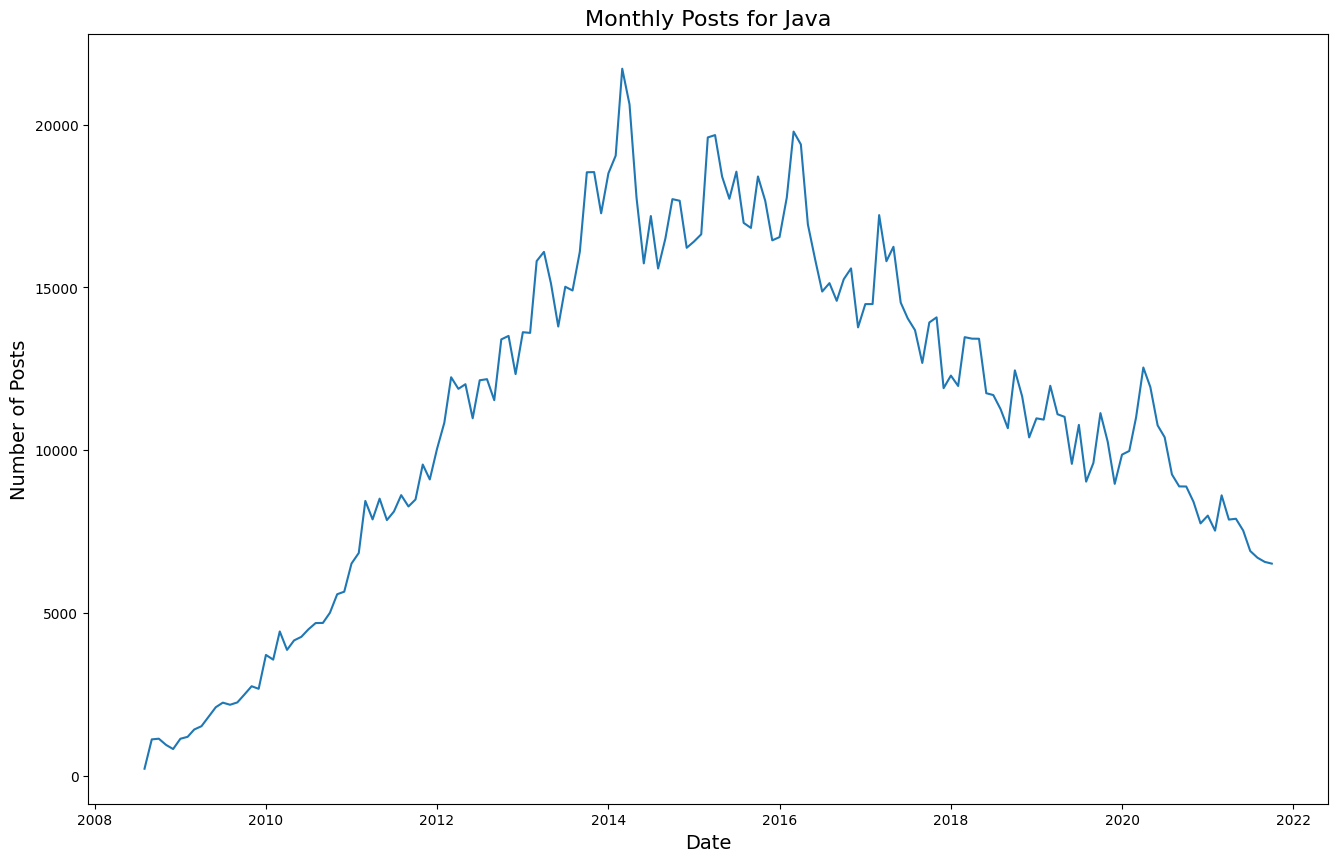

In [28]:
import matplotlib.pyplot as plt
# Filter the DataFrame to get only the rows where the Tag is 'java'
java_df = df[df['Tag'] == 'java']

# Configure the plot size (width, height)
plt.figure(figsize=(16, 10)) 

# Plot the data: Date on x-axis, Posts on y-axis
plt.plot(java_df['Date'], java_df['Posts'])

# Add labels and a title for clarity
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Monthly Posts for Java', fontsize=16)

# Display the plot
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

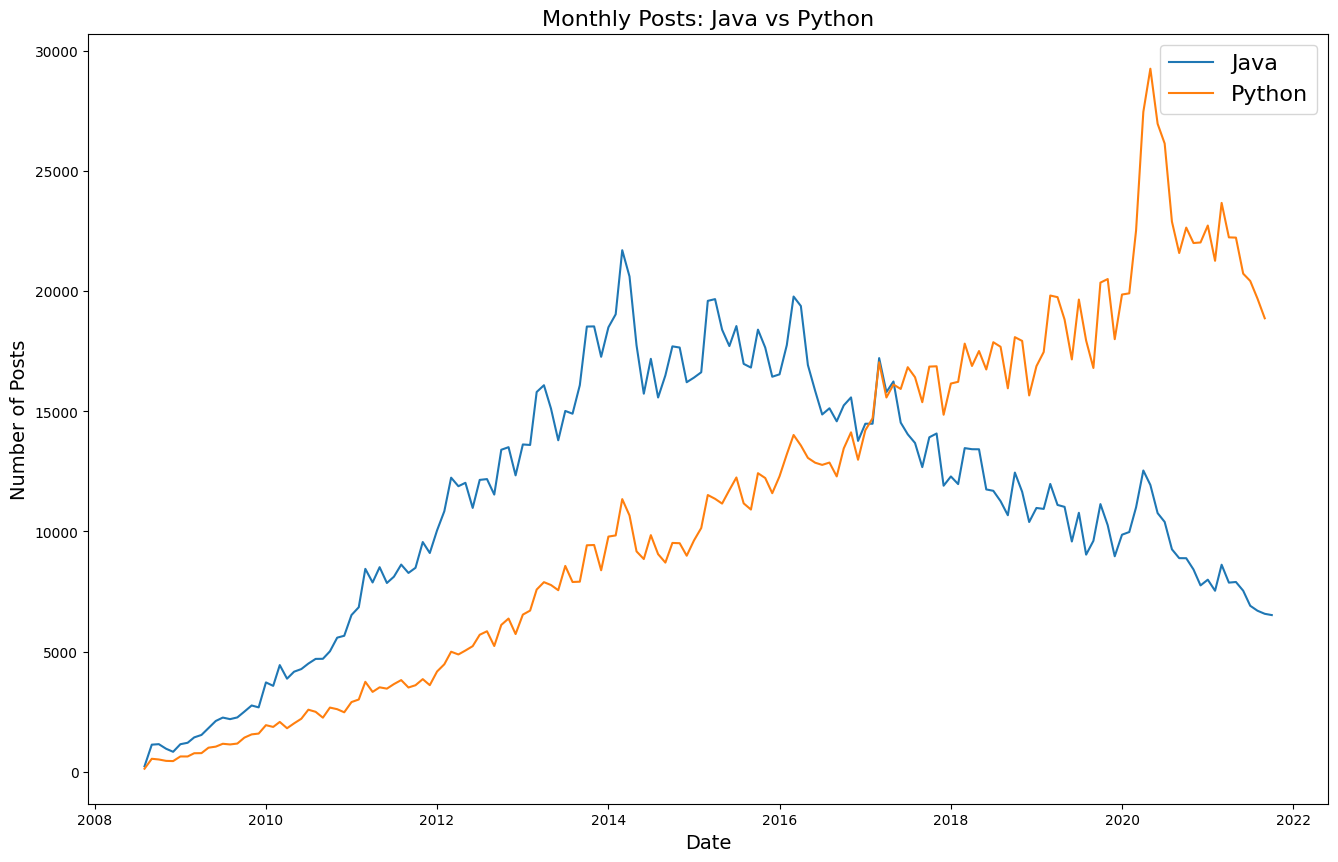

In [29]:
import matplotlib.pyplot as plt

# Filter the DataFrame for each language
java_df = df[df['Tag'] == 'java']
python_df = df[df['Tag'] == 'python']

# Set the figure size
plt.figure(figsize=(16, 10))

# Plot Java
plt.plot(java_df['Date'], java_df['Posts'], label='Java')

# Plot Python
plt.plot(python_df['Date'], python_df['Posts'], label='Python')

# Add styling
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Monthly Posts: Java vs Python', fontsize=16)

# Add a legend to distinguish the lines
plt.legend(fontsize=16)

# Display the chart
plt.show()


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

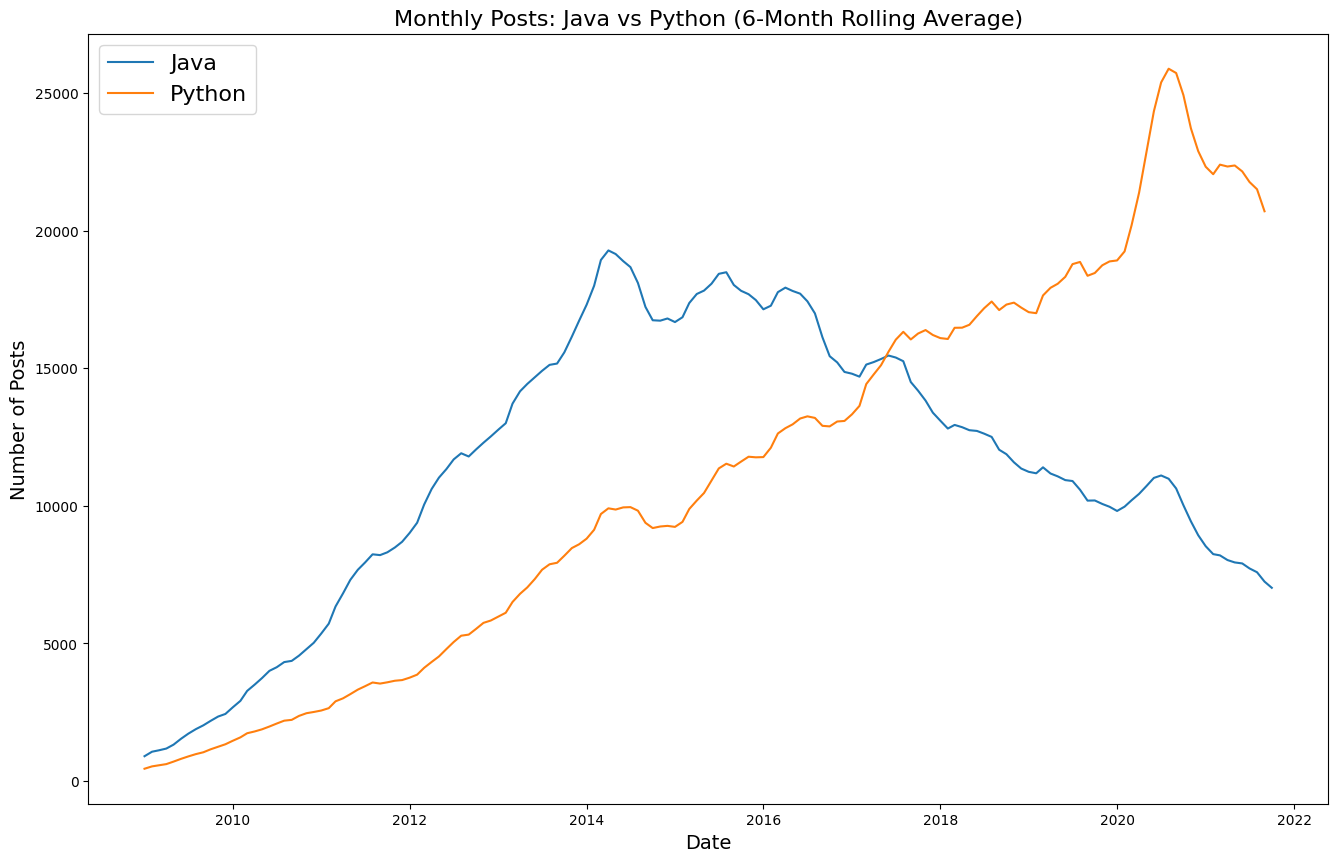

In [30]:
import matplotlib.pyplot as plt

# Filter the DataFrame for each language
java_df = df[df['Tag'] == 'java']
python_df = df[df['Tag'] == 'python']

# Calculate the 6-month rolling average for the 'Posts' column
# This calculates the mean of the current observation and the 5 previous ones
java_smooth = java_df['Posts'].rolling(window=6).mean()
python_smooth = python_df['Posts'].rolling(window=6).mean()

# Set the figure size
plt.figure(figsize=(16, 10))

# Plot Java using the smoothed data
# Note: The first 5 data points will be NaN (Not a Number) and won't be plotted
plt.plot(java_df['Date'], java_smooth, label='Java')

# Plot Python using the smoothed data
plt.plot(python_df['Date'], python_smooth, label='Python')

# Add styling
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Monthly Posts: Java vs Python (6-Month Rolling Average)', fontsize=16)

# Add a legend
plt.legend(fontsize=16)

# Display the chart
plt.show()


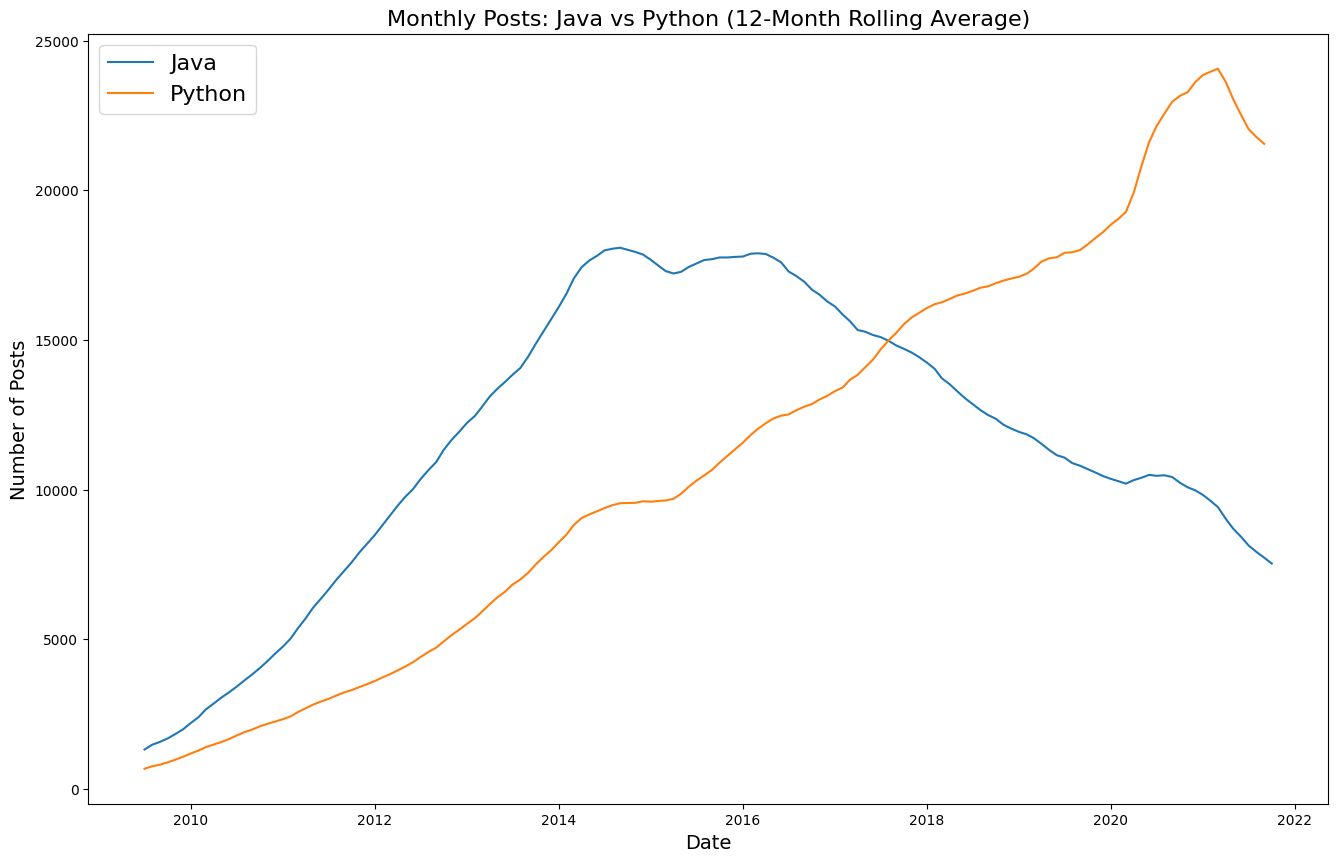

In [31]:
import matplotlib.pyplot as plt

# Filter the DataFrame for each language
java_df = df[df['Tag'] == 'java']
python_df = df[df['Tag'] == 'python']

# Calculate the 12-month rolling average for the 'Posts' column
# This calculates the mean of the current observation and the 11 previous ones
java_smooth = java_df['Posts'].rolling(window=12).mean()
python_smooth = python_df['Posts'].rolling(window=12).mean()

# Set the figure size
plt.figure(figsize=(16, 10))

# Plot Java using the smoothed data
# Note: The first 11 data points will be NaN (Not a Number) and won't be plotted
plt.plot(java_df['Date'], java_smooth, label='Java')

# Plot Python using the smoothed data
plt.plot(python_df['Date'], python_smooth, label='Python')

# Add styling
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Monthly Posts: Java vs Python (12-Month Rolling Average)', fontsize=16)

# Add a legend
plt.legend(fontsize=16)

# Display the chart
plt.show()


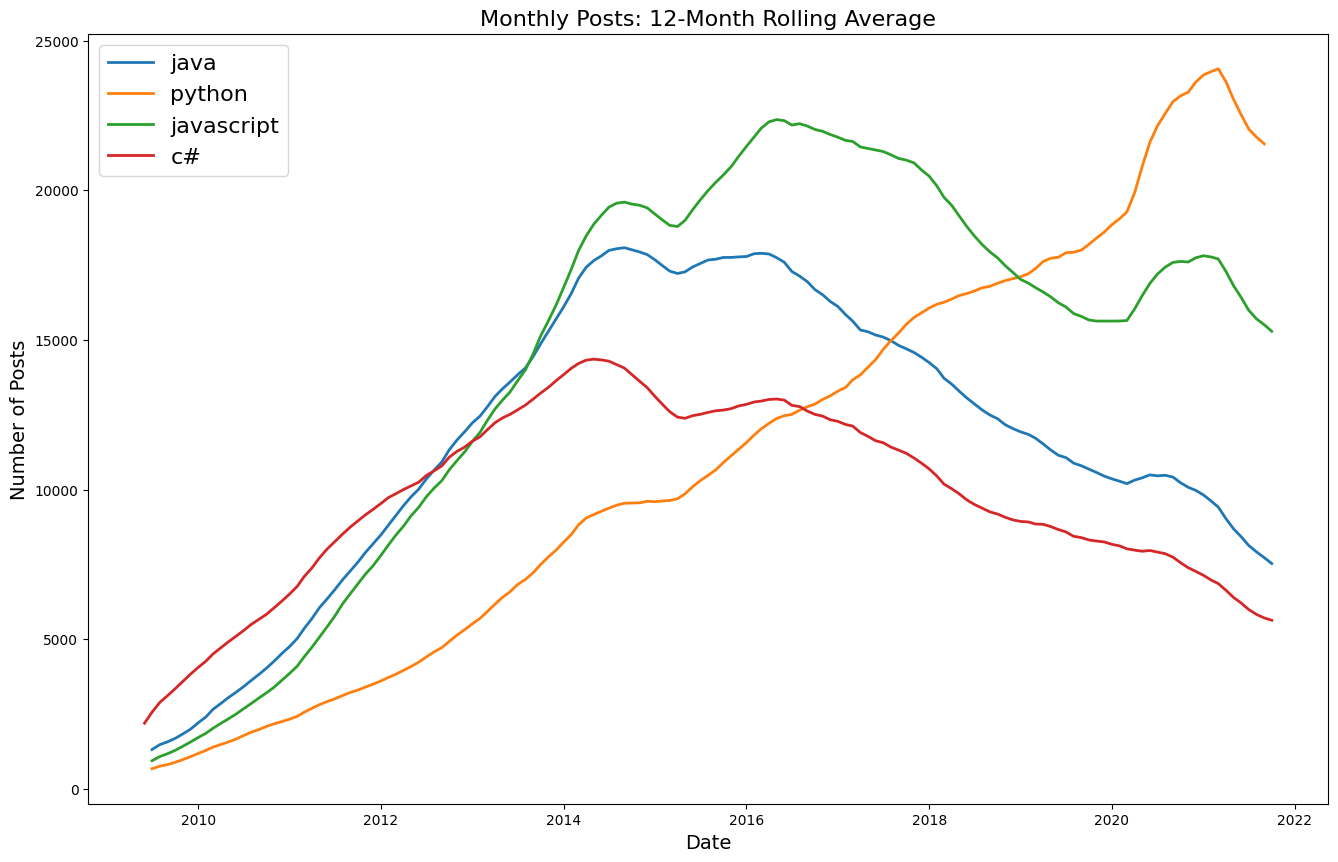

In [32]:
import matplotlib.pyplot as plt

# List of tags to plot
languages = ['java', 'python', 'javascript', 'c#']

# Set the figure size
plt.figure(figsize=(16, 10))

# Loop through each language to plot
for lang in languages:
    # Filter the DataFrame for the specific language
    lang_df = df[df['Tag'] == lang]
    
    # Calculate the 12-month rolling average
    # This smooths out the data over a 1-year window
    smooth_posts = lang_df['Posts'].rolling(window=12).mean()
    
    # Plot the smoothed data
    # We use the original dates for the x-axis
    plt.plot(lang_df['Date'], smooth_posts, label=lang, linewidth=2)

# Add styling
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Monthly Posts: 12-Month Rolling Average', fontsize=16)

# Add a legend to distinguish the lines
plt.legend(fontsize=16)

# Display the chart
plt.show()


**Challenge:** Plot the Posts over time for all language Tags.

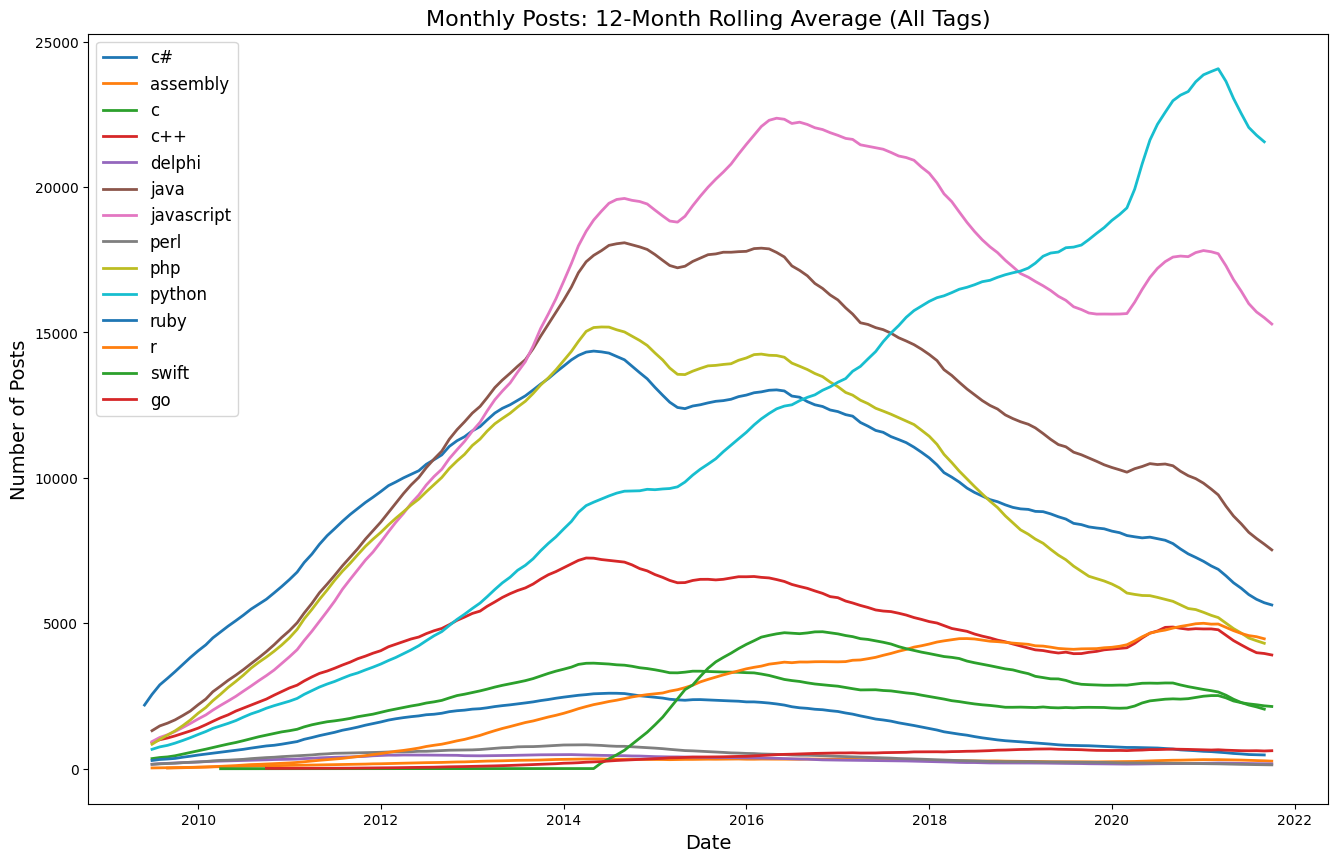

In [33]:
# Get a list of all unique tags present in the DataFrame
all_tags = df['Tag'].unique()

# Set the figure size
plt.figure(figsize=(16, 10))

# Loop through each tag in the dataset
for tag in all_tags:
    # Filter the DataFrame for the specific tag
    tag_df = df[df['Tag'] == tag]
    
    # Calculate the 12-month rolling average
    smooth_posts = tag_df['Posts'].rolling(window=12).mean()
    
    # Plot the smoothed data
    plt.plot(tag_df['Date'], smooth_posts, label=tag, linewidth=2)

# Add styling
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.title('Monthly Posts: 12-Month Rolling Average (All Tags)', fontsize=16)

# Add a legend to distinguish the lines
# Reduced font size slightly to accommodate more entries
plt.legend(fontsize=12)

# Display the chart
plt.show()